In [1]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
#Load MNIST Dataset
# This fetches the full MNIST dataset of 70,000 28x28 images
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

print("Original shape of X:", X.shape)
print("Sample label:", y[0])

Original shape of X: (70000, 784)
Sample label: 5


In [7]:
#Split into Training and Test Sets
bishal_train, bidari_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99, stratify=y
)

print("Training set shape:", bishal_train.shape)
print("Test set shape:", bidari_test.shape)

Training set shape: (56000, 784)
Test set shape: (14000, 784)


In [8]:
#Feature Scaling (StandardScaler for normalization)
scaler = StandardScaler()
bishal_train_scaled = scaler.fit_transform(bishal_train)
bidari_test_scaled = scaler.transform(bidari_test)

# Dimensionality Reduction using PCA
# it'll reduce dimensions to explain 95% of the variance
pca = PCA(n_components=0.95, random_state=99)
bishal_train_pca = pca.fit_transform(bishal_train_scaled)
bidari_test_pca = pca.transform(bidari_test_scaled)

print("Reduced training shape:", bishal_train_pca.shape)
print("Reduced testing shape:", bidari_test_pca.shape)

Reduced training shape: (56000, 326)
Reduced testing shape: (14000, 326)


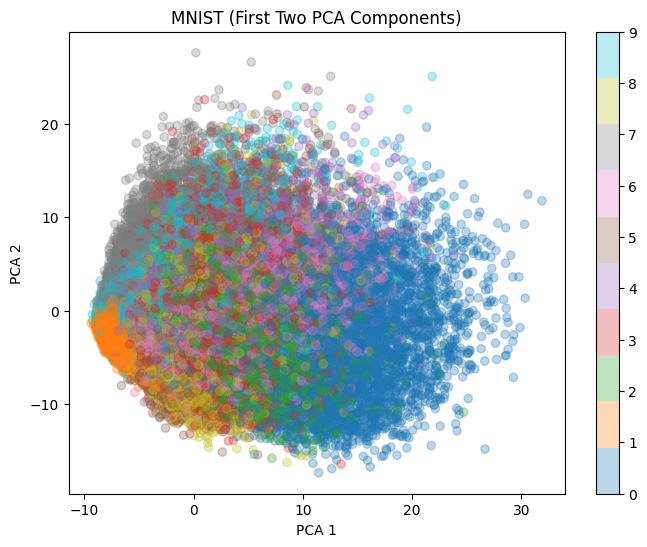

In [9]:
#Visualize first two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(bishal_train_pca[:, 0], bishal_train_pca[:, 1], c=y_train, cmap='tab10', alpha=0.3)
plt.colorbar()
plt.title("MNIST (First Two PCA Components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [10]:
#Step 2 – 
##kNN Classifier (k = 10)

In [10]:
# Import libraries for classification and evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

In [13]:
# Train kNN with k=10
knn_10 = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', metric='minkowski')
knn_10.fit(bishal_train_pca, y_train)

# Make predictions
y_pred_10 = knn_10.predict(bidari_test_pca)

#Evaluate with advanced metrics
print("Classification Report (k=10):")
print(classification_report(y_test, y_pred_10))

# Accuracy Score
acc_10 = accuracy_score(y_test, y_pred_10)
print(f"Accuracy: {acc_10:.4f}")

Classification Report (k=10):
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1381
           1       0.96      0.99      0.97      1575
           2       0.95      0.94      0.95      1398
           3       0.93      0.95      0.94      1428
           4       0.95      0.95      0.95      1365
           5       0.94      0.92      0.93      1263
           6       0.96      0.96      0.96      1375
           7       0.93      0.94      0.94      1459
           8       0.98      0.90      0.94      1365
           9       0.93      0.92      0.93      1391

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000

Accuracy: 0.9474


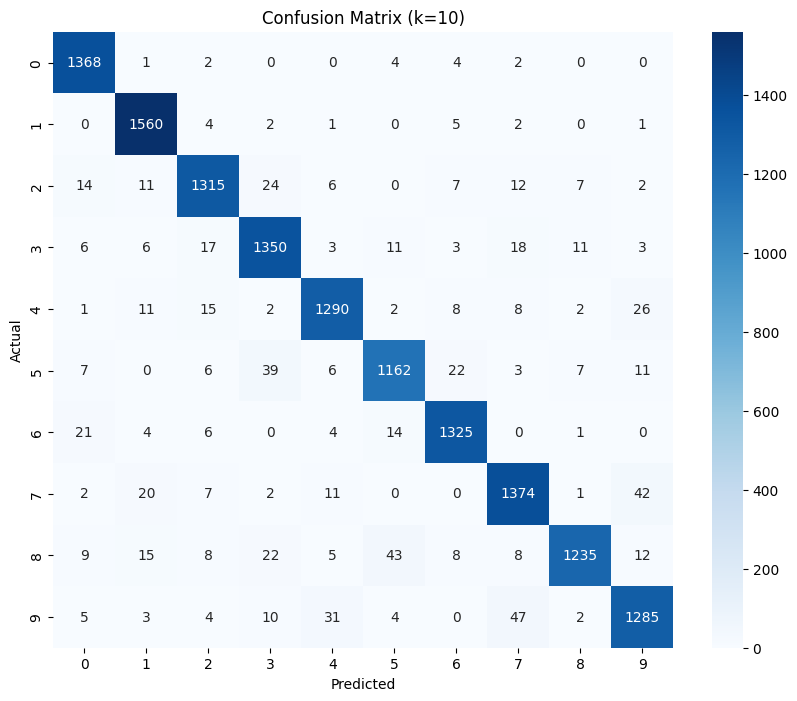

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_10)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (k=10)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
##SVM with Linear and RBF Kernels
# Step 3.1: Import SVM and GridSearch
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [16]:
# Linear SVM
svm_linear = SVC(kernel='linear', random_state=99)
svm_linear.fit(bishal_train_pca, y_train)

# Prediction
y_pred_linear = svm_linear.predict(bidari_test_pca)

# Evaluation
print("🔹 Linear SVM Classification Report")
print(classification_report(y_test, y_pred_linear))

🔹 Linear SVM Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1381
           1       0.96      0.98      0.97      1575
           2       0.90      0.94      0.92      1398
           3       0.91      0.91      0.91      1428
           4       0.93      0.94      0.94      1365
           5       0.91      0.91      0.91      1263
           6       0.96      0.95      0.96      1375
           7       0.94      0.93      0.94      1459
           8       0.94      0.89      0.92      1365
           9       0.93      0.91      0.92      1391

    accuracy                           0.93     14000
   macro avg       0.93      0.93      0.93     14000
weighted avg       0.93      0.93      0.93     14000



In [23]:
# Step 3.3: Train Non-Linear SVM with RBF Kernel
X_sub = bishal_train_pca[:3000]
y_sub = y_train[:3000]

# Parameter grid
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 0.01]
}

# RBF SVM with GridSearchCV
svm_rbf = GridSearchCV(SVC(kernel='rbf', random_state=99), param_grid, cv=3, n_jobs=-1, verbose=1)
svm_rbf.fit(X_sub, y_sub)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(random_state=99), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale', 0.01]}, verbose=1)

In [25]:
# Used best estimator to predict on full test set
best_rbf_model = svm_rbf.best_estimator_
y_pred_rbf = best_rbf_model.predict(bidari_test_pca)

# Evaluation
print("🔹 RBF SVM Classification Report")
print(classification_report(y_test, y_pred_rbf))

# Best parameters
print("Best Parameters for RBF SVM:", svm_rbf.best_params_)

In [28]:
#Neural Network in TensorFlow/Keras

In [33]:
# Step 4.1: Import TensorFlow and build model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

In [30]:
# Step 4.2: One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [34]:
# Step 4.3: Define model architecture
model = Sequential([
    Input(shape=(bishal_train_pca.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [35]:
# Step 4.4: Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Step 4.5: Train model
history = model.fit(
    bishal_train_pca, y_train_cat,
    epochs=15, batch_size=128,
    validation_split=0.2,
    verbose=2
)

Epoch 1/15
350/350 - 2s - 6ms/step - accuracy: 0.7932 - loss: 0.7025 - val_accuracy: 0.9292 - val_loss: 0.2662
Epoch 2/15
350/350 - 1s - 2ms/step - accuracy: 0.9145 - loss: 0.2965 - val_accuracy: 0.9401 - val_loss: 0.2165
Epoch 3/15
350/350 - 1s - 2ms/step - accuracy: 0.9320 - loss: 0.2286 - val_accuracy: 0.9482 - val_loss: 0.1924
Epoch 4/15
350/350 - 1s - 2ms/step - accuracy: 0.9430 - loss: 0.1893 - val_accuracy: 0.9531 - val_loss: 0.1792
Epoch 5/15
350/350 - 1s - 2ms/step - accuracy: 0.9512 - loss: 0.1621 - val_accuracy: 0.9562 - val_loss: 0.1680
Epoch 6/15
350/350 - 1s - 2ms/step - accuracy: 0.9554 - loss: 0.1457 - val_accuracy: 0.9608 - val_loss: 0.1585
Epoch 7/15
350/350 - 1s - 2ms/step - accuracy: 0.9598 - loss: 0.1340 - val_accuracy: 0.9613 - val_loss: 0.1568
Epoch 8/15
350/350 - 1s - 2ms/step - accuracy: 0.9635 - loss: 0.1222 - val_accuracy: 0.9630 - val_loss: 0.1514
Epoch 9/15
350/350 - 1s - 2ms/step - accuracy: 0.9665 - loss: 0.1096 - val_accuracy: 0.9654 - val_loss: 0.1546
E

In [37]:
# Step 4.6: Evaluate model
test_loss, test_accuracy = model.evaluate(bidari_test_pca, y_test_cat, verbose=0)
print(f"Neural Network Test Accuracy: {test_accuracy:.4f}")

Neural Network Test Accuracy: 0.9696


In [ ]:
#Plot Accuracy and Loss

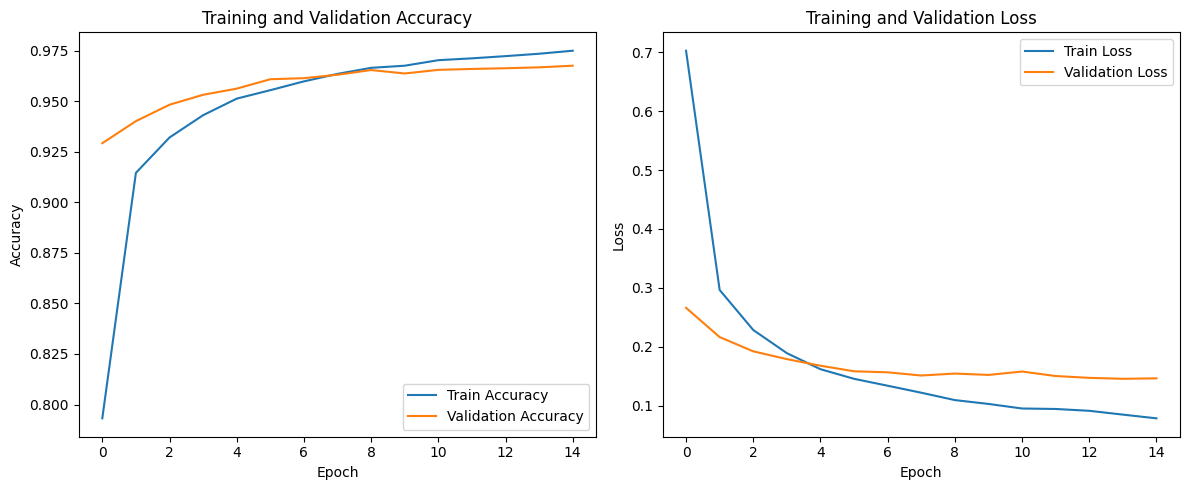

In [38]:
# Visualize training performance
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
#Step 5 – Compare All Classifiers & Analyze Statistically

In [40]:
models = ['kNN', 'SVM Linear', 'SVM RBF', 'Neural Network']

accuracies = [
    accuracy_score(y_test, y_pred_10),
    accuracy_score(y_test, y_pred_linear),
    accuracy_score(y_test, y_pred_rbf),
    test_accuracy  # From NN evaluation
]

precisions = [
    precision_score(y_test, y_pred_10, average='macro'),
    precision_score(y_test, y_pred_linear, average='macro'),
    precision_score(y_test, y_pred_rbf, average='macro'),
    precision_score(y_test, model.predict(bidari_test_pca).argmax(axis=1), average='macro')
]

recalls = [
    recall_score(y_test, y_pred_10, average='macro'),
    recall_score(y_test, y_pred_linear, average='macro'),
    recall_score(y_test, y_pred_rbf, average='macro'),
    recall_score(y_test, model.predict(bidari_test_pca).argmax(axis=1), average='macro')
]

f1s = [
    f1_score(y_test, y_pred_10, average='macro'),
    f1_score(y_test, y_pred_linear, average='macro'),
    f1_score(y_test, y_pred_rbf, average='macro'),
    f1_score(y_test, model.predict(bidari_test_pca).argmax(axis=1), average='macro')
]


438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step


In [41]:
#Step 5.2: Plot Comparison

            Model  Accuracy  Precision    Recall  F1-Score
0             kNN  0.947429   0.947561  0.946609  0.946868
1      SVM Linear  0.934857   0.934517  0.934087  0.934170
2         SVM RBF  0.921929   0.923505  0.921013  0.921798
3  Neural Network  0.969571   0.969491  0.969196  0.969306


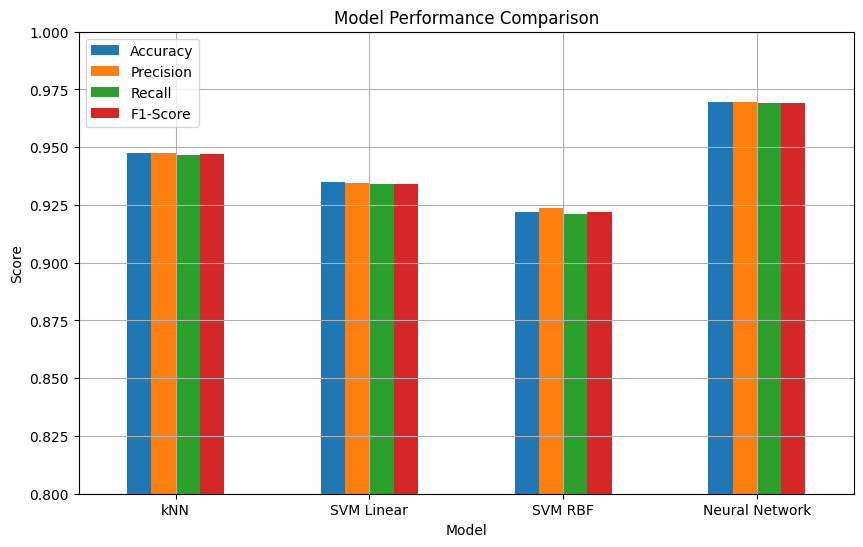

In [42]:
import pandas as pd

# Create a DataFrame for comparison
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1s
})

# Display table
print(df_metrics)

# Plotting
df_metrics.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


In [45]:
#6.1: Load Dataset & Preprocess

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


In [4]:
# Load dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target



In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)



In [6]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("🔹 Linear Regression")
print(f"MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, R2: {r2_lr:.4f}")


🔹 Linear Regression
MSE: 0.4998, MAE: 0.5196, R2: 0.6125


In [8]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train_scaled, y_train)
y_pred_poly = poly_model.predict(X_test_scaled)

# Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("🔹 Polynomial Regression (deg=2)")
print(f"MSE: {mse_poly:.4f}, MAE: {mae_poly:.4f}, R2: {r2_poly:.4f}")


🔹 Polynomial Regression (deg=2)
MSE: 0.4208, MAE: 0.4480, R2: 0.6738


In [9]:
#Ridge and Lasso Regression
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Metrics
print("🔹 Ridge Regression")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}, R2: {r2_score(y_test, y_pred_ridge):.4f}")

print("🔹 Lasso Regression")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}, R2: {r2_score(y_test, y_pred_lasso):.4f}")


🔹 Ridge Regression
MSE: 0.4998, R2: 0.6125
🔹 Lasso Regression
MSE: 0.6467, R2: 0.4986


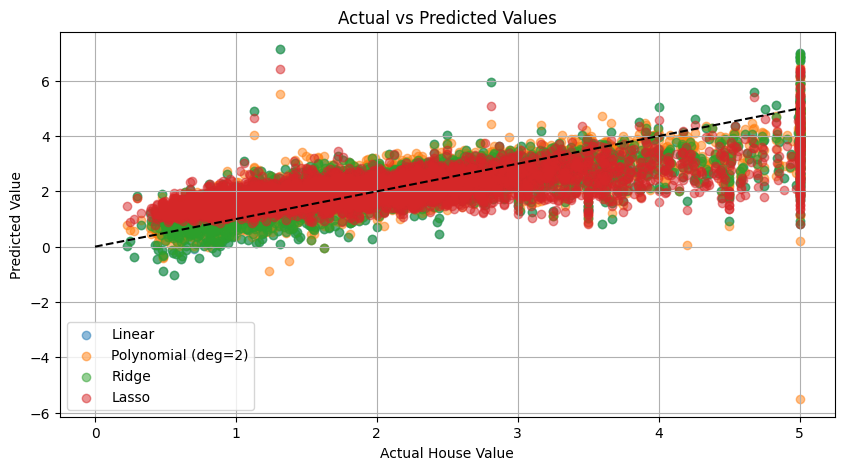

In [10]:
#Visualize Predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear')
plt.scatter(y_test, y_pred_poly, alpha=0.5, label='Polynomial (deg=2)')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.scatter(y_test, y_pred_lasso, alpha=0.5, label='Lasso')
plt.plot([0, 5], [0, 5], color='black', linestyle='--')
plt.xlabel("Actual House Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()
